# Data Normalization?

Normalization is a method of scaling data from any range of values to a range of values between 0 and 1. 
This method requires us to determine the maximum value (max) and minimum value (min) of the data.

# Why do we need to normalize data?

- Identify Duplicate Data
- Improves the performance and accuracy of machine learning models

# How to deal with missing values

The two categories are as follows: Deletion and imputation

### Deletion
     remove a record or observation in the dataset if it contains some missing values.

### Imputation
      fill in the missing value with a substituted value.

### Example
 - Deletion: df.dropna.
 - Imputation: df.fillna,  from sklearn.impute import SimpleImputer, from sklearn.impute import KNNImputer


# Deep Research on Data Scaling

## 1. MaxAbsScaler
   - Def: Scale each feature by its maximum absolute value.
   - Formula: 
                 Xscaled = X / |Xmax| 
   The result of the preceding transformation is a distribution in which the values vary approximately within the range of -1 to 1.

### 1.1. Apply


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [53]:
df_ww_csv = pd.read_csv("winequality-white.csv", sep =';')             # white_wine = ww
df_ww_csv

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [54]:
# df_ww_csv.info()      # no missing values

In [55]:
def plots(df, var, t):
    plt.figure(figsize = (13,5))
    plt.subplot(121)
    plt.hist(df[var], bins = 100)
    plt.title(var +' before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]])
    plt.hist(p1, bins = 100)
    plt.title(var + ' after '+ str(t).split('(')[0])


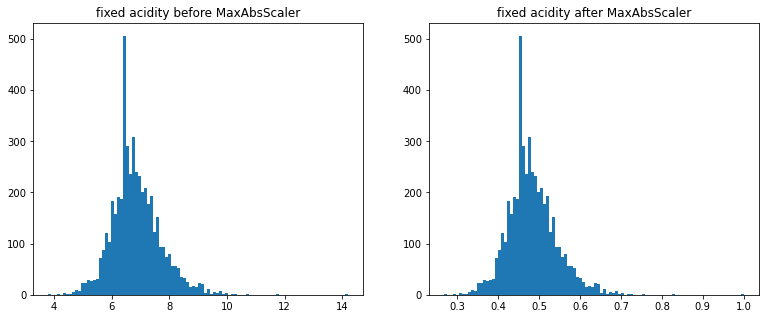

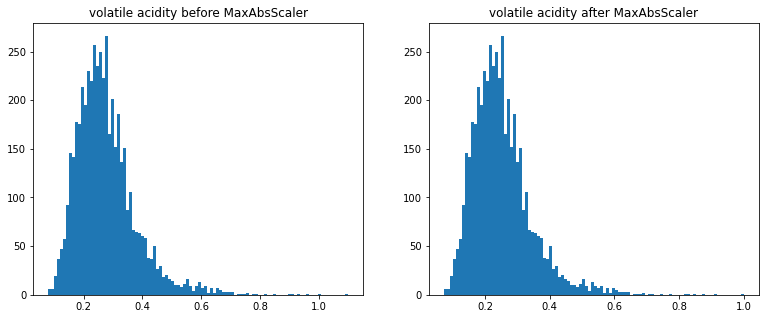

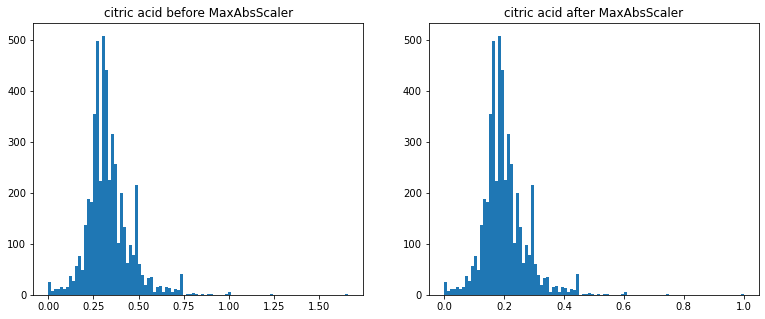

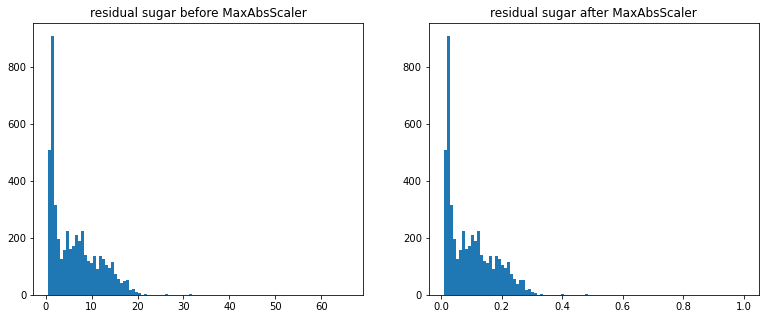

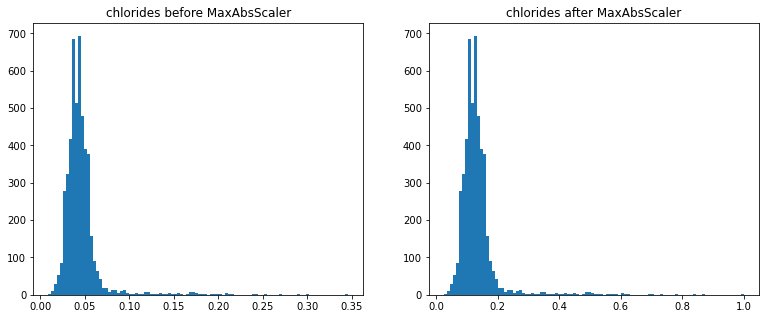

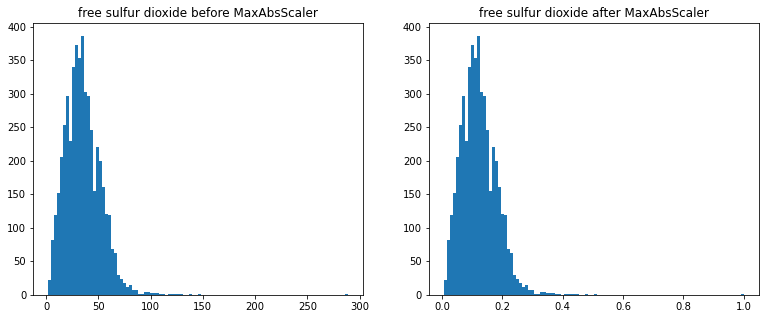

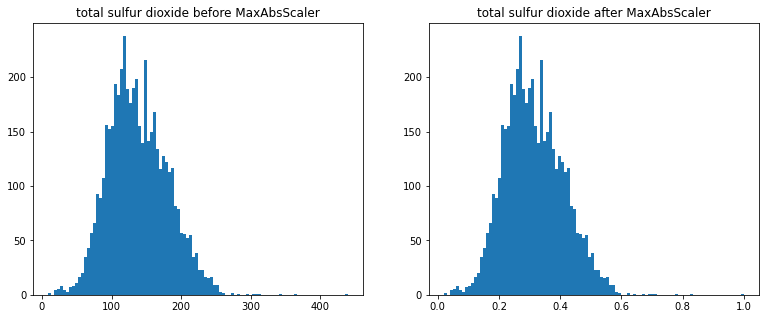

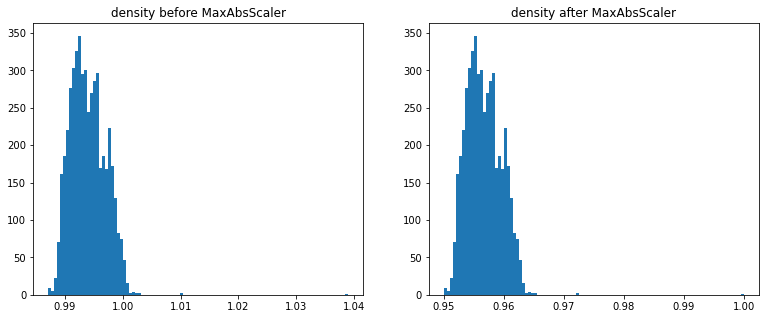

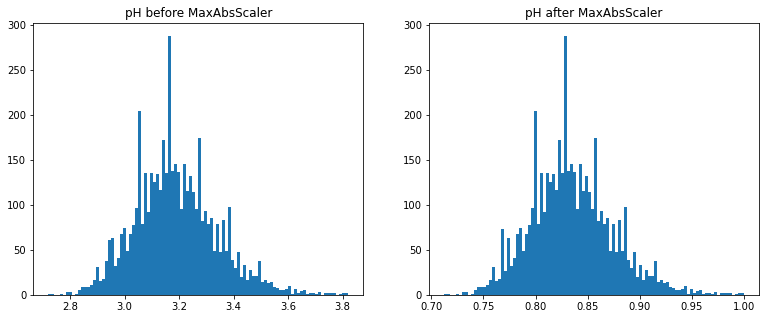

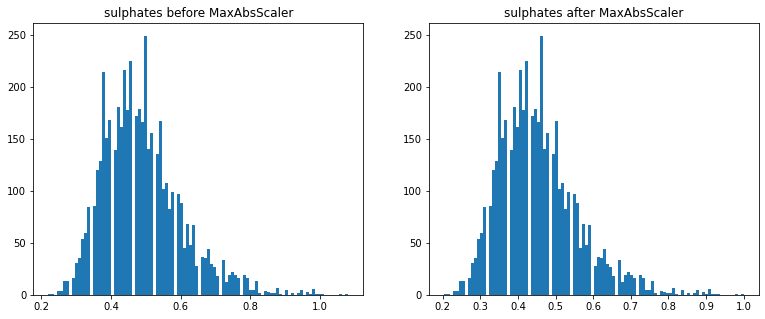

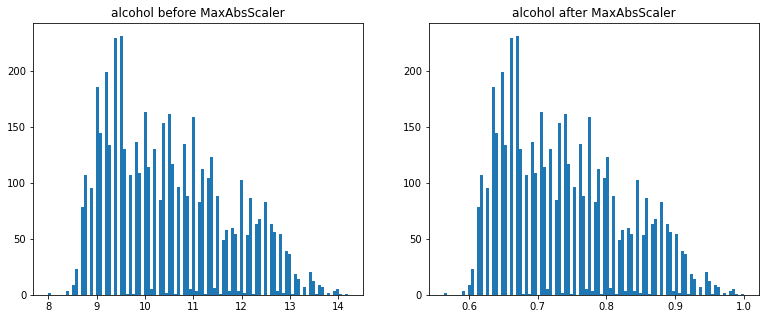

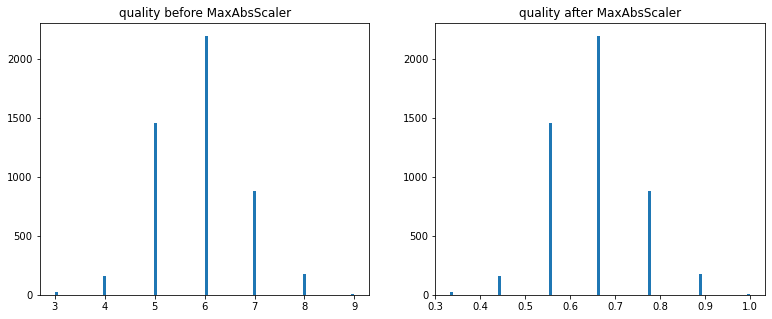

In [56]:
for col in df_ww_csv.columns:
    plots(df_ww_csv, col , MaxAbsScaler())

## 2. Robust Scaler
   - Def: ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.
   - Work: removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. 
### Formula: value = (value – median) / (p75 – p25)
   
   - Note: useful when a feature has a marginal outlier
       

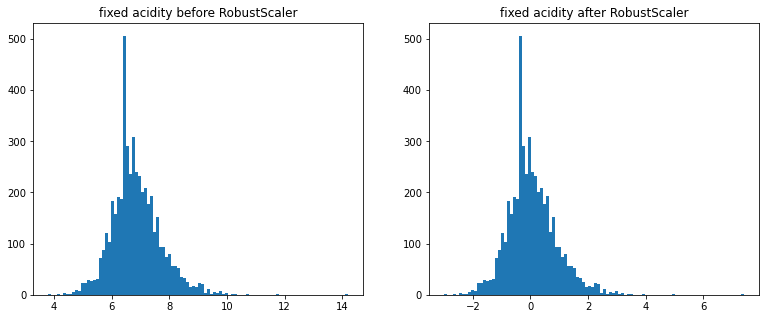

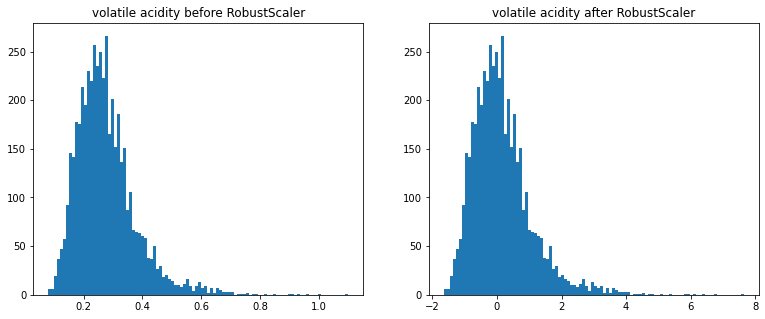

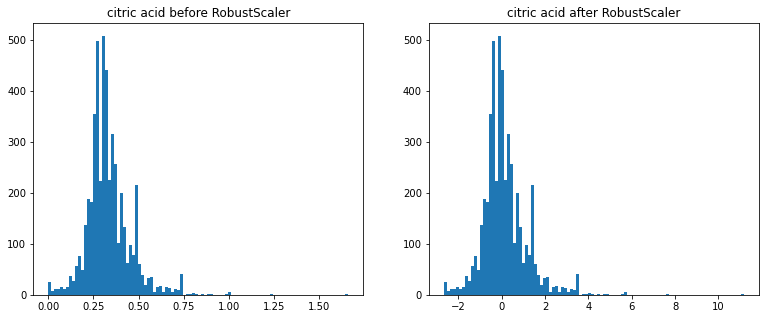

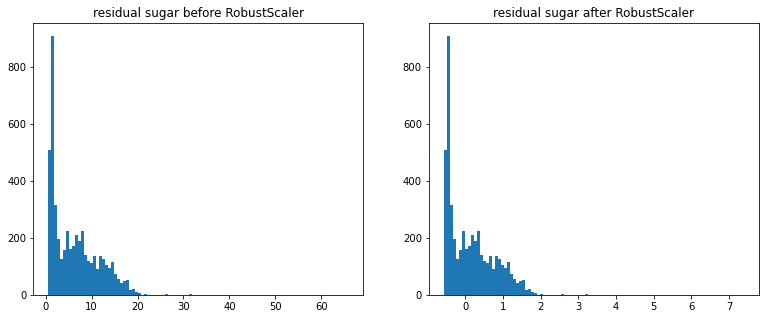

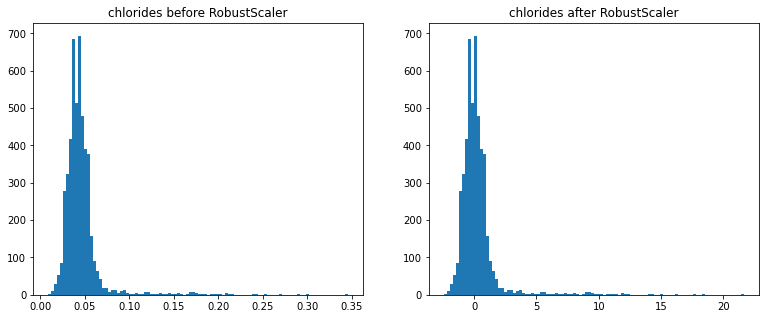

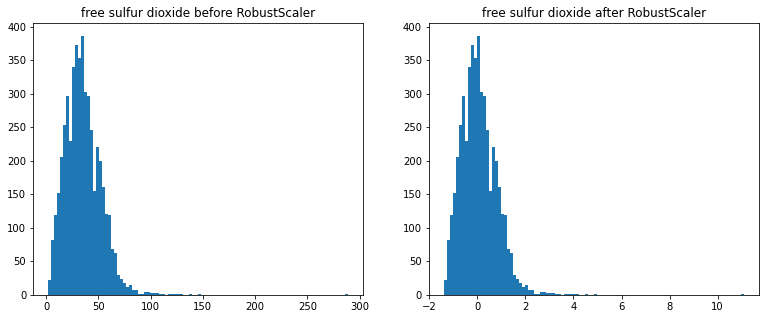

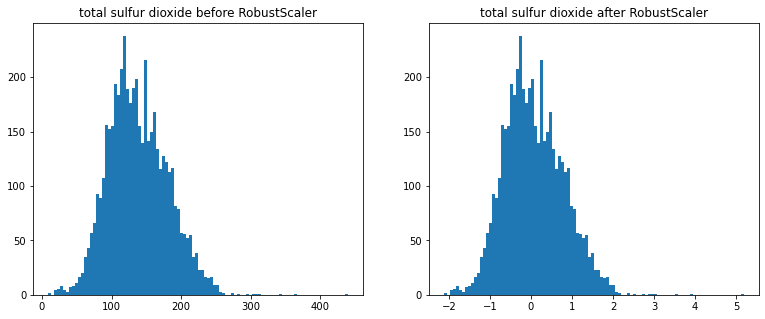

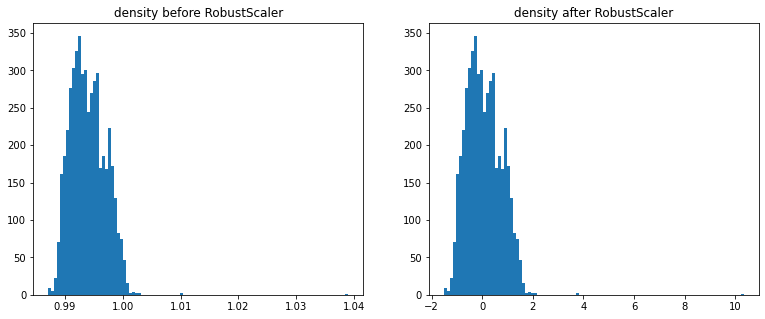

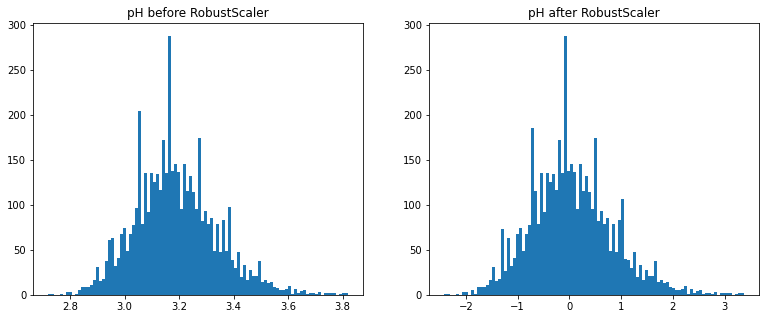

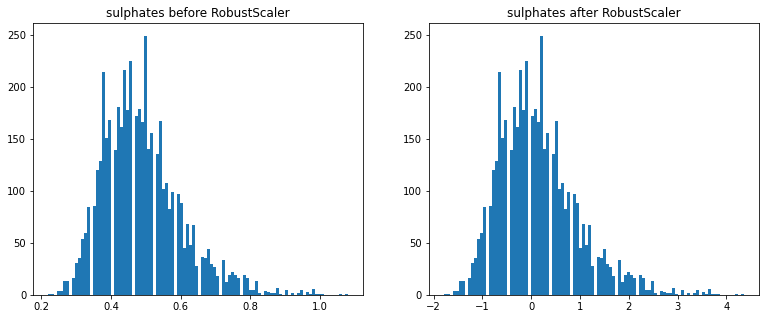

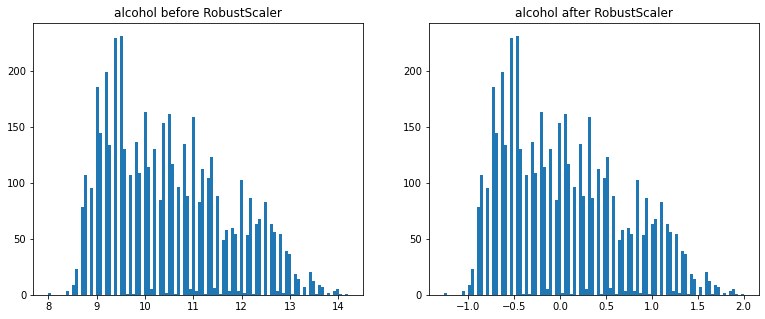

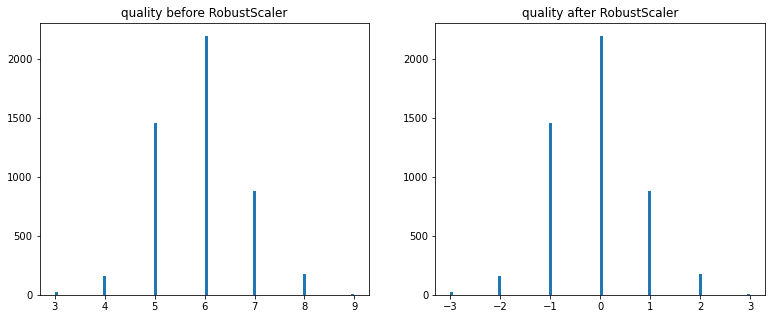

In [58]:
def plots(df, var, t):
    plt.figure(figsize = (13,5))
    plt.subplot(121)
    plt.hist(df[var], bins = 100)
    plt.title(var +' before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]])
    plt.hist(p1, bins = 100)
    plt.title(var + ' after '+ str(t).split('(')[0])
for col in df_ww_csv.columns:
    plots(df_ww_csv, col , RobustScaler())